In [1]:
from optim import *
from collections import OrderedDict
import plotly.express as px
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
tickers = list(pd.read_excel("portfolioTickers.xlsx")["highCorrelationPortfolio"])
prices = yf.download(tickers, period = "10y", progress = False)["Close"]
prices

YF.download() has changed argument auto_adjust default to True


Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-04-27,30.950945,40.372829,25.837803,47.441776,49.679432,51.570156,42.783974,35.674679,26.844589,22.621117
2015-04-28,31.231510,40.631664,25.934135,47.552910,49.923355,51.964981,43.186218,36.082832,27.082279,22.789602
2015-04-29,30.891880,40.428787,25.771112,47.265274,49.569664,51.609631,43.054462,35.810726,26.914497,22.621115
2015-04-30,30.227386,39.785187,25.141287,46.859955,48.557423,51.043732,42.686893,34.915634,26.320282,22.148623
2015-05-01,30.419336,39.897106,25.378399,46.873016,48.831829,51.260868,42.763172,35.008717,26.369221,22.346411
...,...,...,...,...,...,...,...,...,...,...
2025-04-21,96.480003,105.529999,72.099998,52.060001,131.779999,120.169998,110.959999,56.380001,66.949997,59.290001
2025-04-22,99.150002,108.150002,73.699997,53.400002,135.800003,122.529999,113.300003,58.049999,68.360001,61.029999
2025-04-23,98.629997,107.019997,73.500000,53.330002,136.160004,121.419998,112.519997,57.959999,68.110001,61.230000


In [3]:
returns = prices.pct_change().dropna()
returns

Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-04-28,0.009065,0.006411,0.003728,0.002343,0.004910,0.007656,0.009402,0.011441,0.008854,0.007448
2015-04-29,-0.010875,-0.004993,-0.006286,-0.006049,-0.007085,-0.006838,-0.003051,-0.007541,-0.006195,-0.007393
2015-04-30,-0.021510,-0.015919,-0.024439,-0.008575,-0.020421,-0.010965,-0.008537,-0.024995,-0.022078,-0.020887
2015-05-01,0.006350,0.002813,0.009431,0.000279,0.005651,0.004254,0.001787,0.002666,0.001859,0.008930
2015-05-04,0.009467,0.005787,0.003211,0.000837,0.006618,0.000771,0.007136,0.009614,0.008218,0.014096
...,...,...,...,...,...,...,...,...,...,...
2025-04-21,-0.021997,-0.020240,-0.011110,-0.020876,-0.013253,-0.013383,-0.010169,-0.018454,-0.020769,-0.024835
2025-04-22,0.027674,0.024827,0.022191,0.025740,0.030505,0.019639,0.021089,0.029620,0.021061,0.029347
2025-04-23,-0.005245,-0.010448,-0.002714,-0.001311,0.002651,-0.009059,-0.006884,-0.001550,-0.003657,0.003277


OrderedDict([('AEE', 0.09906264863435099),
             ('AEP', 0.10225006275452178),
             ('CMS', 0.10168801160773906),
             ('D', 0.09761534832868692),
             ('DTE', 0.10055228998172974),
             ('DUK', 0.10351174357690388),
             ('ED', 0.10596823671388124),
             ('ES', 0.09290791402619109),
             ('EVRG', 0.10327608788524958),
             ('LNT', 0.0931676564907458)])

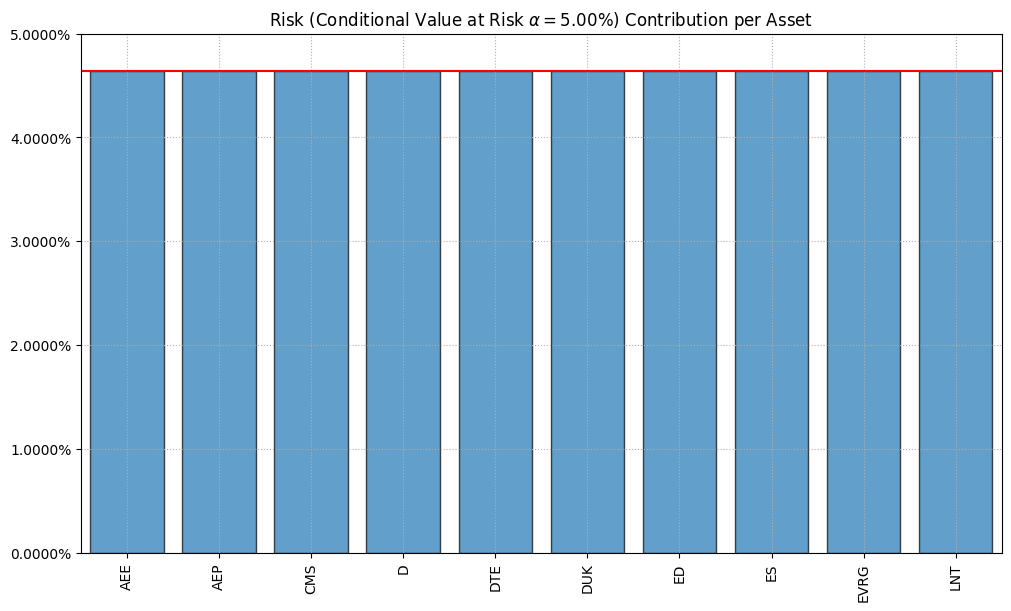

In [4]:
weights, rcPlot = riskParityERC(prices, risk_measure = "CVaR")
weights

In [5]:
rebalancedWeights = weightsRebalancing(weights, returns, rebalance_freq='ME')
rebalancedWeights

Ticker,AEE,AEP,CMS,D,DTE,DUK,ED,ES,EVRG,LNT
Date,,,,,,,,,,
2015-04-28,0.099063,0.102250,0.101688,0.097615,0.100552,0.103512,0.105968,0.092908,0.103276,0.093168
2015-04-29,0.098635,0.102414,0.101719,0.097669,0.100502,0.103486,0.106346,0.092819,0.103317,0.093092
2015-04-30,0.098254,0.102602,0.101023,0.098577,0.100226,0.104197,0.107340,0.092131,0.102858,0.092792
2015-05-01,0.099063,0.102250,0.101688,0.097615,0.100552,0.103512,0.105968,0.092908,0.103276,0.093168
2015-05-04,0.099355,0.102178,0.101356,0.097067,0.100565,0.102923,0.106036,0.093196,0.103453,0.093871
...,...,...,...,...,...,...,...,...,...,...
2025-04-21,0.099064,0.103896,0.101812,0.094252,0.100249,0.107205,0.111475,0.088028,0.104545,0.089473
2025-04-22,0.099326,0.103883,0.101538,0.094324,0.100792,0.106649,0.111055,0.088429,0.104148,0.089856
2025-04-23,0.099172,0.103178,0.101638,0.094549,0.101434,0.106075,0.110699,0.088619,0.104152,0.090485


In [6]:
px.line(rebalancedWeights)

In [7]:
CVaROptimizationTargetReturn(prices.dropna(), target_return=0.10, alpha=0.05)

Expected annual return: 10.0%
Conditional Value at Risk: 2.84%
(np.float64(0.10000000000043048), np.float64(0.028417247339066344))


OrderedDict([('AEE', 0.02968),
             ('AEP', 0.14856),
             ('CMS', 0.12),
             ('D', 0.0),
             ('DTE', 0.04598),
             ('DUK', 0.15088),
             ('ED', 0.36204),
             ('ES', 0.0),
             ('EVRG', 0.14287),
             ('LNT', 0.0)])

In [8]:
weightsPlot(RobustLedoitWolfCustomDeltaTargetReturn(prices,
                                                    target_return=0.1, 
                                                    expected_returns_method = "historical_mean", 
                                                    custom_delta = 0.5, 
                                                    allow_shorting = False), title = "Ledoit-Wolf weights (d = 0.5)")

Expected annual return: 10.0%
Annual volatility: 14.8%
Sharpe Ratio: 0.67
(np.float64(0.09999999999999999), np.float64(0.14835416288724942), np.float64(0.6740626488250346))


In [9]:
weightsPlot(RobustLedoitWolfCustomDeltaMaxSharpe(prices=prices, custom_delta=0.5))

Expected annual return: 10.8%
Annual volatility: 15.3%
Sharpe Ratio: 0.71
(np.float64(0.1077819135239239), np.float64(0.15265009028449808), np.float64(0.7060717312583822))


In [10]:
weightsPlot(MVOTangentPortfolio(prices = prices, cov_matrix_method="oracle"))

Expected annual return: 11.7%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.1174549215257882), np.float64(0.20878437315777473), np.float64(0.5625656736149958))


In [11]:
weightsPlot(MVOTangentPortfolio(prices = prices), title = "Mean-Variance weights")

Expected annual return: 11.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.11752387044996858), np.float64(0.2090026720620963), np.float64(0.562307980517356))


In [12]:
weightsPlot(MVOTargetReturn(prices = prices, target_return=0.1))

Expected annual return: 10.0%
Annual volatility: 19.4%
Sharpe Ratio: 0.52
(np.float64(0.1), np.float64(0.19386445056146498), np.float64(0.5158243283406664))


In [13]:
pxs = yf.download(["AAPL", "NVDA", "BND", "JPM"], period = "10y", progress = False)["Close"]
rx = pxs.pct_change().dropna()
nw = {"AAPL": 0.4, "BND": 0.1, "JPM": 0.25, "NVDA": 0.25}
px.line(weightsRebalancing(nw, returns_df = rx, rebalance_freq = "QE"))

In [14]:
MVOTargetReturn(prices = prices, target_return = 0.10)

Expected annual return: 10.0%
Annual volatility: 19.4%
Sharpe Ratio: 0.52
(np.float64(0.1), np.float64(0.19386445056146498), np.float64(0.5158243283406664))


OrderedDict([('AEE', 0.0),
             ('AEP', 0.2224108252527194),
             ('CMS', 0.0969223046554249),
             ('D', 0.0),
             ('DTE', 0.17101066640829),
             ('DUK', 0.1636557556552046),
             ('ED', 0.2709615235607022),
             ('ES', 0.0),
             ('EVRG', 0.0750389244676589),
             ('LNT', 0.0)])

In [15]:
MVOTangentPortfolio(prices=prices)

Expected annual return: 11.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.11752387044996858), np.float64(0.2090026720620963), np.float64(0.562307980517356))


OrderedDict([('AEE', 0.6846463270801058),
             ('AEP', 0.0595318415574809),
             ('CMS', 0.1542226364854122),
             ('D', 0.0),
             ('DTE', 0.1006108624772954),
             ('DUK', 0.0),
             ('ED', 0.0009883323997058),
             ('ES', 0.0),
             ('EVRG', 0.0),
             ('LNT', 0.0)])

<Axes: xlabel='Volatility', ylabel='Return'>

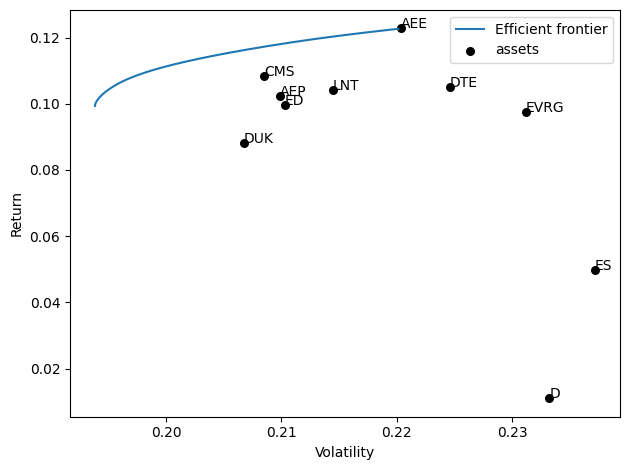

In [16]:
MVOPlotEfficientFrontier(prices = prices)

In [17]:
weightsPlot(MVOTangentPortfolio(prices=prices))

Expected annual return: 11.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.56
(np.float64(0.11752387044996858), np.float64(0.2090026720620963), np.float64(0.562307980517356))


In [33]:
weightsPlot(OrderedDict(rpMVO(prices = prices, risk_measure = "EDaR")["weights"]))